[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/mcwg/calc-python-labs/blob/main/Lab3-Linear-Regression.ipynb)


# Lab 3: Linear Regression with Worldwide $\text{CO}_2$ Emissions Data

---

![UN SDGs](https://github.com/mcwg/calc-python-labs/raw/main/Images/UN-SDGs.png)

Image Credit: [https://www.un.org/sustainabledevelopment/](https://www.un.org/sustainabledevelopment/)

<br>  

The United Nations (UN) launched [Sustainable Development Goals (SDGs)](https://www.un.org/sustainabledevelopment/) in 2015. The UN states the purpose of the goals as follows:

> The Sustainable Development Goals are a call for action by all countries – poor, rich and middle-income – to promote prosperity while protecting the planet. They recognize that ending poverty must go hand-in-hand with strategies that build economic growth and address a range of social needs including education, health, social protection, and job opportunities, while tackling climate change and environmental protection.



[Goal 13](https://www.un.org/sustainabledevelopment/climate-change/) of the SDGs is *Climate Action*. Goal 13 begins with the following:

> Every person, in every country in every continent will be impacted in some shape or form by climate change. There is a climate cataclysm looming, and we are underprepared for what this could mean.

The increase in the concentration of greenhouse gases such as $\text{CO}_2$ can trap heat from the sun and contribute to climate change. In this lab we import and analyze data from the [World Bank Database](https://data.worldbank.org/) on the worldwide $\text{CO}_2$ emissions over the period from 2010 to 2019. We use Python to create visualizations (scatterplots) to identify potential patterns and build a model for worldwide $\text{CO}_2$ emissions.

## Saving Your Work to a Colab Notebook

---

This lab is a shared Colab notebook available for anyone to view. However, since everyone is sharing this notebook, you do not have permission to save changes to this shared Colab notebook. In order to save your work:

1. You will need to set up a free Google Drive account. If you already have a Google Drive account, you are ready to go!
2. Click the `Copy to Drive` button to the right of the `+ Code` and `+ Text` buttons on top of the notebook.
3. Select from the menu `File/Save a Copy in Drive`.
  - By default, the notebook will be saved in a folder named **Colab Notebooks** in your Drive.
  - Feel free to rename and store the notebook wherever you like.


# Learning Objectives

---

- Importing and storing external data as a dataframe using the `pandas` library.
- Creating scatterplots to visual patterns in data.
- Defining vectorized functions to transform variables.
- Performing linear regression with `numpy.polyfit`.
- Making predictions with linear models.

# Importing Required Libraries

---



In [ ]:
#################################
# Run to load required libraries
#################################
import numpy as np  # import numpy
import pandas as pd  # import pandas
import matplotlib.pyplot as plt  # import matplotlib.pyplot

## How Often Do We Need to Import Libraries?

---

After importing a library for the first time, we can now access functions in the library in any code cell we run, regardless of where the code cell is located in the notebook. Thus, we only need to run `import` commands such as `import numpy as np` or `import pandas as pd` once, and then we can continue calling in functions from those libraries (using specified abbreviations) for as long as the session remains active. If you take a break while working in Colab, your session may *time out* and disconnect.

- We need to import libraries one time after opening a notebook or reconnecting after timing out.
- We do not need to import the library again unless we take a break and the connection times out.


# Dataframes

---

A **dataframe** is a system for storing data in rows and columns, similar to an Excel spreadsheet.

- Each row of a dataframe corresponds to a different **observation**.
- Each column of a dataframe corresponds to a different **variable**.

We will use the [Pandas library](https://pandas.pydata.org/) to import and store data as [Pandas DataFrames](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

## Types of Variables

---

Variables (columns) of a dataframe correspond to different attributes or characteristics of an observation.

- The term *variable* is used since the values of the characteristic *vary* from observation to observation.
- We use the term variable differently in this context than we do when talk about algebraic variables.

Each variable of a dataframe can be stored as different data types.

-  If a variable is measured or counted by a number, it is called a **quantitative** or **numerical** variable.
-  If a variable groups observations into different categories or rankings, it is a **qualitative** or a **categorical** variable.



# Loading and Storing Worldwide $\text{CO}_2$ Emissions Data

---

To begin our analysis on worldwide $\text{CO}_2$ emissions, we first need data. Data has been exported from the [World Bank Database](https://data.worldbank.org/) with worldwide $\text{CO}_2$ emissions (in kilotons, kt) over the period from 2010 to 2019 and saved to a [comma separated values](https://en.wikipedia.org/wiki/Comma-separated_values) (or csv) file named `CO2-emissions.csv` that we load from [GitHub](https://raw.githubusercontent.com/mcwg/calc-python-labs/main/Data/CO2-emissions.csv).

- The Pandas command [`pandas.read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) can be used to store data from a csv file to a dataframe using the Pandas library.
- We have already imported the Pandas library with the abbreviation `pd`.

Run the code cell below to import and store worldwide $\text{CO}_2$ emissions data to a dataframe called `world_co2`. *There will not be any output displayed since the code does not ask for the data to be displayed.*

In [ ]:
###################################
# Run to store data in a dataframe
###################################
world_co2 = pd.read_csv('https://raw.githubusercontent.com/mcwg/calc-python-labs/main/Data/CO2-emissions.csv')

# Getting to Know Our Data

---

The previous code cell created a dataframe named `world_co2`. Run the code cell below to display the data stored in `world_co2` to the screen.



In [ ]:
###########################
# Run to display dataframe
###########################
world_co2 # display dataframe on screen

,Year,CO2_Emissions
0,2010,32095872.94
1,2011,33079721.35
2,2012,33460087.50
3,2013,34119894.39
4,2014,34261369.66
5,2015,34070176.85
6,2016,34145652.30
7,2017,34687837.09
8,2018,35560555.79
9,2019,35477245.40


## Data Dictionary for `world_co2`

---

The dataframe `world_co2` has a total of 10 observations.
- There is one observation for each year starting in 2010 and ending in 2019.

The dataframe `world_co2` contains two variables named (or labeled) `Year` and `CO2_Emissions`.

- `Year` is a quantitative variable that gives the year of the observation.
- `CO2_Emissions` is a quantitative variable that gives the total worldwide $\text{CO}_2$ emissions in kilotons (kt).



### The Index Column

---

The first, unlabeled column is called the **index column**, and it is *not* a variable. The first column indicates the row number (or index) for each row in the dataframe. **In Python, indexing starts at 0** (not at 1).
  - The $1^{\text{st}}$ row has row index `0`.
  - The $2^{\text{nd}}$ row has row index `1`.
  - In general, the $i^{\text{th}}$ row has row index `i-1`.

We can ignore the index column for now. However, we will discuss indexing and slicing dataframes in [Lab 4](https://githubtocolab.com/mcwg/calc-python-labs/blob/main/Lab4-Derivatives-with-Water-Level.ipynb).


# Question 1

---

Based on the data stored in the dataframe `world_co2` displayed after running the code cell above, what was the amount of $\text{CO}_2$ emissions generated worldwide in 2015?




## Solution to Question 1

---

In 2015, the world's $\text{CO}_2$ emissions were <mark>??</mark>.

<br>  

*Be sure to include units in your answer.*

<br>  
<br>  

# Storing Variables in NumPy Arrays

---



`NumPy` and `Pandas` are two of the most useful libraries in Python for storing, manipulating, and analyzing data.

- A dataframe is a two-dimensional data structure since data is arranged and stored in rows and columns.
- NumPy arrays can have different **dimensions**.
  - A one-dimensional NumPy array is called a **vector**. Values are stored in a single row.
  - A two-dimensional NumPy array is called a **matrix**. Values are arranged in rows and columns similar to a dataframe


Storing a variable (column) from a two-dimensional dataframe as a one-dimensional NumPy array is useful when we wish to transform a variable (such as changing units) in our dataframe by applying operation(s) to the vector stored as a one-dimensional NumPy array. The Pandas library has a [`to_numpy()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html) function we can apply to store values of a dataframe variable as a NumPy array.

Run the code cell below to store the values of the variable `Year` in the dataframe `world_co2` to a (one-dimensional) NumPy array  named `year`.


In [ ]:
##############################################
# Run to store variable Year as a NumPy array
##############################################
year = world_co2['Year'].to_numpy()  # store Year as a 1-dim array
year  # print array to screen

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

# Question 2

---

The worldwide $\text{CO}_2$ emissions (in kilotons) from 2010 to 2019 are stored in the dataframe `world_co2` in the column labeled `CO2_Emissions`.

- Replace the `??` in the code cell below with an appropriate command to store the values of the variable `CO2_Emissions` in the dataframe `world_co2` to a NumPy array named `co2`.

- Then run the code cell and verify the output displayed on the screen is correct.

## Solution to Question 2

---

In [ ]:
###########################################
# Solution to Question 2
# Replace ?? with an appropriate command
###########################################

co2 = ??  # store CO2 emissions as a numpy array
co2  # print values in vector co2 to screen

# Visualizing the Data with a Scatterplot

---

Data modeling is the process of presenting relationships between different features of the data. Often the process begins by looking for relationships by selecting an appropriate graph or plot. When comparing two quantitative variables such as `year` and `co2`, a **scatterplot** is useful to help identify which formula is most appropriate.


## Predictor and Response Variables

---

Suppose we would like to construct a model to predict the world's annual $\text{CO}_2$ emissions (in kilotons) in different years.

- `year` is called the **predictor** or **explanatory variable**.
  - The horizontal axis corresponds to values of the predictor variable, `year`.

-  `co2` is the annual world $\text{CO}_2$ emissions (in kilotons) and is called the **response** or **target variable**.
  - The vertical axis corresponds to values of the response variable, `co2`.




## Creating a Scatterplot

---

For each observation in our data, we can express the values of the predictor and response variables as coordinates of an ordered pair of values.


- (predictor, response) $=$ (`year`, `co2`)

A **scatterplot** is a graph of all points (predictor, response). We can look for patterns in the scatterplot to see how values of the response variable, `co2`, are related to values of the predictor variable, `year`.

In the first code cell of this notebook, we imported [`matplotlib.pyplot`](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) using the abbreviation `plt`. Run the code cell below to create a scatterplot of the the data using the [`pyplot.scatter()`](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.scatter.html) function.

<br>  

*Note: You do not need to edit the code cell below. Simply run the code cell below to generate a scatterplot.*

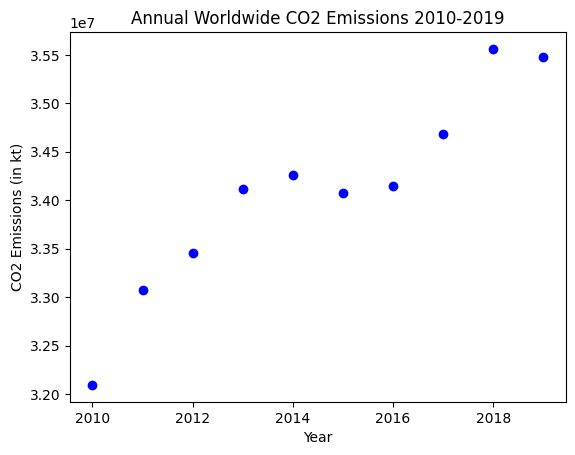

In [ ]:
###########################################################
# Run code cell to create a scatterplot.
# You do not need to edit any commands in this code cell.
###########################################################
plt.scatter(year,  # array where predictor variable stored
            co2,  # array where response variable stored
            color ='blue')  # option to set point color

###############
# Plot options
###############
plt.title('Annual Worldwide CO2 Emissions 2010-2019')  # main plot label
plt.xlabel('Year')  # label on x-axis
plt.ylabel('CO2 Emissions (in kt)')  # label on y-axis
#plt.grid(True)  # add gridlines to plot
plt.show()  # show the plot on the screen

# Transforming Variables

---


Suppose we would like to **transform** or **manipulate** the predictor variable `year` and measure time as years since 2010. We store the transformed values to a new vector `t`. We could compute each of the 10 values stored in the vector `t` separately:

- The first entry in `t` is $2010 - 2010 = 0$
- The second entry in `t` is $2011 - 2010 = 1$
- $\vdots$
- The last entry in `t` is $2019 - 2010 = 9$

The 10 calculations outlined above can be computed with 10 separate commands or using a loop. Both of these methods require multiple lines of code that repeat the same calculations over and over again.

**Vectorization** is a method used to improve the efficiency of Python code by eliminating the use of loops and repetitive calculations. Instead of repeating the same operation over and over again to each value stored in a vector, **we apply the operation subtract 2010 from `year` once to the entire vector**:

- `t = year - 2010`.


Run the code cell below to create a new vector `t` that is the number of years since 2010.


In [ ]:
###############################
# Run to define a new vector
# t that is years since 2010
###############################
t = year - 2010  # create vector t, years since 2010
t  # print result to screen

# Question 3

---

The worldwide $\text{CO}_2$ emissions stored in the vector `co2` are very large values. To help make the values easier to read and interpret, we can convert the units of the $\text{CO}_2$ emissions from kilotons to *millions of kilotons*.


Use a vectorized function to convert $\text{CO}_2$ emissions from kt to millions of kt. Store the resulting output to a new variable named `co2_mil_kt`.

<br>  

*Hint: Divide the $\text{CO}_2$ emissions in `co2` by 1,000,000.*




## Solution to Question 3

---

Replace the `??` in the code cell below with a vectorized function. Then run code cell and verify the output stored in `co2_mil_kt` is correct.

<br>  

In [ ]:
###########################
# Solution to Question 3
###########################
co2_mil_kt = ??  # convert to millions of kt
co2_mil_kt  # print output to screen and verify result

# Question 4

---

Use the code cell below to create a scatterplot to display the relation between predictor variable `t` (years since 2010) and the response variable  `co2_mil_kt`, worldwide $\text{CO}_2$ emissions in millions of kt.

Replace each of the four `??`'s in the code cell below to adjust the variables plotted and the labels on the axes. Then compare the resulting scatterplot to the scatterplot of `year` and `co2` that was created above.




In [ ]:
###########################
# Solution to Question 4
###########################
plt.scatter(??,  # predictor variable
            ??,  # response variable
            color ='blue')  # set point color

###############
# Plot options
###############
plt.title('Annual Worldwide CO2 Emissions 2010-2019')  # main plot label
plt.xlabel('??')  # label on x-axis
plt.ylabel('??')  # label on y-axis
plt.show()  # show the plot on the screen

## Solution to Question 4

---


Comment on the similarities and differences between the scatterplot created above and the scatterplot we first created using the variables `year` and `co2`.


<br>  
<br>  

# Finding the Line of Best Fit

---

The points in the scatterplot above are not perfectly linear. The points generally follow an upward trend, though there are dips at couple of points. The data appears roughly linear, and we can use a linear model of the form

$$\text{co2_mil_kt} \approx \color{dodgerblue}{m} \cdot \text{t} + \color{tomato}{a}.$$

as an initial model for the data.

What are values for the coefficients  $\color{dodgerblue}{m}$ and $\color{tomato}{a}$ in the formula above that results in the linear model that *best fits* the data?

# Question 5

---

An interactive plot or applet in Python is called a [**widget**](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Basics.html). The code in the cell below creates a Python widget with two interactive sliders that can be used to adjust the values of the slope $\color{dodgerblue}{m}$ and vertical intercept $\color{tomato}{a}$ in the formula for a possible line of best fit of the form

$$\text{co2_mil_kt} \approx \color{dodgerblue}{m} \cdot \text{t} + \color{tomato}{a}.$$

In order to interact with and update the plot:

- We run the code cell below once.
- Then we adjust the slope and vertical intercept with the two sliders above the plot.
  - The first slider adjusts the slope, $\color{dodgerblue}{m}$.
  - The second slider adjusts the vertical intercept, $\color{tomato}{a}$.
- As we adjust the values with the sliders the plot will automatically update.

Run the code cell to create a Python widget. Then use the sliders to choose different values for the slope $\color{dodgerblue}{m}$ and vertical intercept $\color{tomato}{a}$ that results in a line that *best fits the data*. *You do not need to edit, interpret, or understand the code in the cell below.*






# Question 5

---


In [ ]:
########################################################
# Run code cell to generate an interactive widget.
# Do not edit the code cell. Just run it!
# Then adjust the sliders to find the line of best fit.
########################################################
from ipywidgets import interactive, FloatSlider  # import interactive elements

def plot_line_of_best_fit(slope, intercept):

    # Plot scatterplot
    plt.scatter(t, co2_mil_kt, label='Observed Data')

    # Plot the line with chosen slope and intercept
    x_values = np.linspace(min(t), max(t), 100)
    y_values = slope * x_values + intercept
    plt.plot(x_values, y_values, color='red', label='Line of Best Fit')

    # Plot labels and legend
    plt.xlabel('t, years since 2010')
    plt.ylabel('CO2 Emissions (in millions of kt)')
    plt.title('Find a Possible Line of Best Fit')
    plt.ylim(30, 36)
    plt.legend()

    # Show plot
    plt.grid(True)
    plt.show()

# Create sliders for slope and intercept
intercept_slider = FloatSlider(value=34.0, min=30.0, max=36.0, step=0.25, description='Vertical Intercept, a:')
slope_slider = FloatSlider(value=0.2, min=0, max=1.0, step=0.05, description='Slope, m:')

# Create an interactive plot
interactive_plot = interactive(plot_line_of_best_fit, intercept=intercept_slider, slope=slope_slider)

# Display the interactive plot
interactive_plot

## Solution to Question 5

---

- The slope of the line of best fit is approximately $\color{dodgerblue}{m} = $ <mark>??</mark>.

- The vertical intercept of the line of best fit is approximately $\color{tomato}{a}=$ <mark>??</mark>.

<br>  
<br>  

# Linear Regression

---

The process of fitting a line to a set of data points is called **linear regression** and the line of best fit is called the **regression line**.

## Linear Regression with NumPy `polyfit`

---

The `numpy.polyfit(x, y, deg)` function performs a least-squares polynomial fit and has three main inputs:

- `x` is the vector where the predictor variable values are stored.
- `y` is the vector where the response variable values are stored.
- `deg` is the degree of the polynomial (`deg=1` for linear fit, `deg=2` for quadratic fit, ...).
- See [`numpy.polyfit()` documentation](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) for more information.


**When we do linear regression, we set `deg = 1`**, and the output of `numpy.polyfit(x, y, 1)` is an array with two values:

- The first value in the output is the slope $m$ of the regression line.
- The second value in the output is the vertical intercept $a$ of the regression line.

Run the code cell below to find the slope and vertical intercept of the line that best fits the data points (`t`, co2_mil_kt`).




In [ ]:
################################
# Run to find the coefficients
# for the line of best fit
################################

np.polyfit(t, co2_mil_kt, 1)  # (predictor, response, deg)

<a name="q6"></a>
# Question 6

---

Based on the output of the previous code cell, give a formula for the regression line.

## Solution to Question 6

---

Type the formula for the line of best fit.

$$\text{co2_mil_kt} = \ ?? \ t + \ ?? $$

<br>  
<br>  


# Question 7

---

Interpret the practical meaning of the values of the regression coefficients $m$ and $a$ in [Question 6](#q6). Include units in your interpretations.

## Solution to Question 7

---


<br>  
<br>  


## Storing the Output of `polyfit`

---

In the case of linear regression, we have two regression coefficients $m$ and $a$.  Thus, the output of the command `np.polyfit(t, co2_mil_kt, 1)` is an array with two entries:

- The first value `0.32620013` is the slope, $m$.
- The second value `32.62794072` is the vertical intercept, $a$.

Entering the command `np.polyfit(t, co2_mil_kt, 1)` displays the values on the screen, but the values are not being stored.

- In Python, we assign values using `=`.
- If the output is an array with two entries, then we need to define two objects (separated by a comma) where each of the values is stored.

In the code cell below, the command `m, a = np.polyfit(t, co2_mil_kt, 1)` computes and stores the slope and vertical intercept of the line of best fit to objects named `m` and `a`, respectively.

Run the code cell below to compute, store, and print the values of the regression coefficients.




In [ ]:
########################################
# Run to find and store and print the
# coefficients for the line of best fit
########################################
m, a = np.polyfit(t, co2_mil_kt, 1)  # (predictor, response, deg)

print("The slope is ", m,
      "\nThe vertical intercept is ", a)

# Making Predictions

---


We have determined the formula for the regression line is

$$\text{co2_mil_kt} = \color{dodgerblue}{0.326} \ \text{t} + \color{tomato}{32.628}.$$

We can use the formula for the regression line to make **predictions** about the amount of the world's $\text{CO}_2$ emissions for different values of the predictor variable $t$ (years since 2010).

Suppose we want to predict the world's $\text{CO}_2$ emissions in 2030 if $\text{CO}_2$ emissions continue to follow the pattern of our model based on data from 2010 to 2019.

- The year 2030 is $t=20$ years since 2010.
- We can evaluate the regression line at $t=20$ to obtain our prediction.

Thus, our model predicts the world's $\text{CO}_2$ emissions in 2030 will be

$$0.326 (20) + 32.628 \approx 39.148 \text{ million kt}.$$

We have previously stored the values of the slope and vertical intercept of the regression line to `m` and `a`, respectively. Thus, we can calculate the predicted world $\text{CO}_2$ emissions in 2030 using the code `m * 20 + a`.

<br>

*Note: The values stored `m` and `a` are `0.32620013387878916` and `32.62794072454544`, respectively. Thus, the formula `m * 20 + a` results in a more accurate prediction than the calculation `0.326 * 20 + 32.628`.*




In [ ]:
###########################################
# Run to compute prediction in 2030 (t=20)
###########################################
m * 20 + a   # prediction

# Question 8

---

Replace each ?? in the code cell below to create a vector named `co2_predict` that contains the predicted worldwide $\text{CO}_2$ emissions for each value of $t$ stored in the vector `t`. Then run the code cell to compute, store, and print the predictions on screen.

- The first prediction (in 2010) should be approximately $32.628$ million kt.
- The final prediction (in 2019) should be approximately $35.564$ million kt.


<br>   

*Hint: Recall how we applied vectorized functions earlier to create vectors:*

- *`t = year - 2010` subtracts 2010 from each value stored in `year`.*
- *`co2_mil_kt = co2 / 1000000` divides each value stored in `co2` by 1,000,000.*

*Apply similar operations to the vector `t` to create a vector of predicted values named `co2_predict`.*



In [ ]:
######################################################
# Solution to Question 8
# Replace each ?? with the name of the variable where
# you have previously stored the appropriate values.
######################################################
co2_predict = ?? * t + ??  # compute predicted values
co2_predict

# Comparing Plots of the Regression Line  and Observed Data

---
Run the code cell below to use the predicted values in `co2_predict` to add the regression line to the scatterplot to compare the predicted $\text{CO}_2$ emissions to the observed $\text{CO}_2$ emissions over the period from $t=0$ to $t=9$.


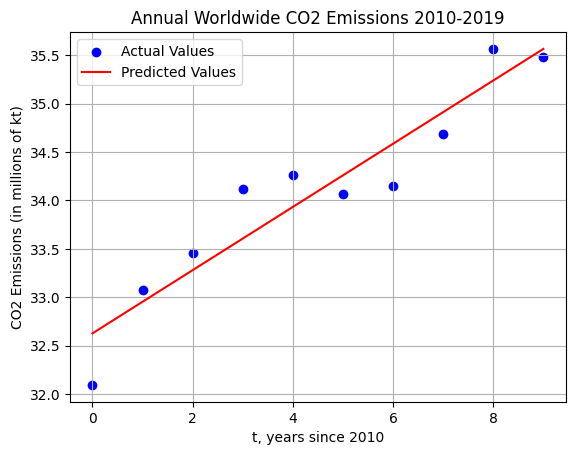

In [ ]:
###########################################################
# Run code cell to create plot.
# You do not need to edit any commands in this code cell.
###########################################################

###########################
# Add scatterplot
###########################
plt.scatter(t,  # predictor variable
            co2_mil_kt,  # response variable
            color ='blue',  # set point color
            label='Actual Values')  # label for points

###########################
# Add line of best fit
###########################
plt.plot(t,  # predictor variable
         co2_predict,  # predicted value of response variable
         color='red',  # set color of line
         label='Predicted Values')  # label for line

###############
# Plot options
###############
plt.title('Annual Worldwide CO2 Emissions 2010-2019')  # main plot label
plt.xlabel('t, years since 2010')  # label on x-axis
plt.ylabel('CO2 Emissions (in millions of kt)')  # label on y-axis
plt.grid(True)  # add gridlines to plot
plt.legend()  # add legend to plot
plt.show()  # show the plot on the screen

# Question 9

---

Based on the graph above, estimate error of the prediction in 2016.

## Solution to Question 9

---



<br>  
<br>  
<br>  

# Question 10

---

Instead of using the transformed variables stored in vectors `t` and `co2_mil_kt`, we can construct a linear model using the (non-transformed) values stored in the vectors `year` and `co2`.

- Find the coefficients $a$ and $m$ for regression line that models the relationship between `year` and `co2`.
- Intepret the practical meaning of the values of the coefficients in the model.
- Compare the new coefficients to the coefficients from the model using `t` and `co2_mil_kt` in [Question 6](#q6).




In [ ]:
###################################################
# Solution to Question 10
# Replace ?? with a command to find the values of
# the regression coefficients.
###################################################

m_2, a_2 = ??

print("The slope is ", m_2,
      "\nThe vertical intercept is ", a_2)

## Solution to Question 10

---

Interpret the practical meaning of the values of the regression coefficients of the model in the previous code cell.




<br>  
<br>  

Is the value of the slope in the new model equal to the  slope from the model in [Question 6](#q6)? In practical terms, explain why the slopes are equal or not equal.




<br>  
<br>  

Is the value of the vertical intercept in the new model equal to the vertical intercept from the model in [Question 6](#q6)? In practical terms, explain why the vertical intercepts are equal or not equal.




<br>  
<br>  


# Be Sure You Have Saved Your Work!

---

This lab is a shared Colab notebook available for anyone to view. However, since everyone is sharing this notebook, you do not have permission to save changes to this shared Colab notebook. In order to save your work:

1. You will need to set up a free Google Drive account. If you already have a Google Drive account, you are ready to go!
2. Click the `Copy to Drive` button to the right of the `+ Code` and `+ Text` buttons on top of the notebook.
3. Select from the menu `File/Save a Copy in Drive`.
  - By default, the notebook will be saved in a folder named **Colab Notebooks** in your Drive.
  - Feel free to rename and store the notebook wherever you like.


# Code Summary

---


## Loading External Data to a Dataframe with Pandas

Data Source: [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and the [Palmer Station, Antarctica LTER](https://pallter.marine.rutgers.edu/), a member of the [Long Term Ecological Research Network](https://lternet.edu/).



In [ ]:
# import pandas to be able to work with data frames
import pandas as pd


# import data from URL as dataframe named df
df = pd.read_csv('https://raw.githubusercontent.com/mcwg/calc-python-labs/main/Data/palmer-penguins.csv')

# display the dataframe
df

## Storing columns as NumPy Arrays


In [ ]:
# Load data for this example:
import numpy as np
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/mcwg/calc-python-labs/main/Data/palmer-penguins.csv')

# The dataFrame has a column 'body_mass_g'
# The following command stores the 'body_mass_g' column into a regular Numpy array
mass = df['body_mass_g'].to_numpy()

# print the NumPy array
mass

## Transforming Variables

---



In [ ]:
# Load data for this example.
# penguin mass in grams is stored into the numpy array called "mass"
import numpy as np
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/mcwg/calc-python-labs/main/Data/palmer-penguins.csv')
mass = df['body_mass_g'].to_numpy()

# convert mass to thousands of grams
mass_kg = mass / 1000

# print
print("Mass in kg:\n", mass_kg)

## Creating a Scatterplot from data in a dataframe

---


In [ ]:
# Load data for this example
import numpy as np
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/mcwg/calc-python-labs/main/Data/palmer-penguins.csv')

mass = df['body_mass_g'].to_numpy()  # NumPy array with mass in grams
bill_length = df['bill_length_mm'].to_numpy()  # NumPy array with bill length in mm

# Load matplotlib for the plot
import matplotlib.pyplot as plt

##############################
# Run to create a scatterplot
##############################
plt.scatter(mass,  # x-values in numpy array (horizontal axis)
            bill_length,  # y-values in numpy array (vertical axis)
            color ='blue')  # set point color

###############
# Plot options
###############
plt.title('A Sample Scatterplot')  # main plot label
plt.xlabel('Body Mass (in grams)')  # label on x-axis
plt.ylabel('Bill Length (in mm)')  # label for the y-axis
#plt.grid(True)  # add gridlines to plot

# Display the scatter plot
plt.show()

## Linear Regression with NumPy `polyfit`

---



In [ ]:
# Load data for this example
import numpy as np
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/mcwg/calc-python-labs/main/Data/palmer-penguins.csv')

mass = df['body_mass_g'].to_numpy()
bill_length = df['bill_length_mm'].to_numpy()

# Find a line of best fit for bill_length as a function of mass_kg
# uses np.polyfit(x-values, y-values, deg), with deg = 1 for a line
slope, intercept = np.polyfit(mass, bill_length, 1)  # find slope and intercept of line of best fit

# Display slope and intercept
print("The slope is", slope)
print("The vertical intercept is", intercept)

## Comparing Plots of the Regression Line and Observed Data

---



In [ ]:
# Load data for this example
import numpy as np
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/mcwg/calc-python-labs/main/Data/palmer-penguins.csv')

mass = df['body_mass_g'].to_numpy()
bill_length = df['bill_length_mm'].to_numpy()
slope, intercept = np.polyfit(mass, bill_length, 1)  # find slope and intercept of line of best fit
fit_line_predicted_bill_length = slope * mass + intercept # compute predicted bill_length with line of best fit

##############################
# Create scatterplot
##############################
plt.scatter(mass,  # x-values in numpy array (horizontal axis)
            bill_length,  # y-values in numpy array (vertical axis)
            color ='blue',  # set point color
            label='Actual Values')  # label for points

###########################
# Add line of best fit
###########################
plt.plot(mass,  # x-values same as data (horizontal axis)
         fit_line_predicted_bill_length,  # y-values from the line of best fit  (vertical axis)
         color='red',  # set color of line
         label='Predicted Values')  # label for line

###########################
# Format the plot
###########################
plt.title('A Sample Linear Regression')  # main plot label
plt.xlabel('Body Mass (in grams)')  # label on x-axis
plt.ylabel('Bill Length (in mm)')  # label for the y-axis
#plt.grid(True)  # add gridlines to plot

# Display the plot
plt.show()  # show the plot on the screen

In [ ]:
#################
# Importing data
#################
year = np.array([2010,
                 2011,
                 2012,
                 2013,
                 2014,
                 2015,
                 2016,
                 2017,
                 2018,
                 2019])

world_$\text{CO}_2$ = np.array([32095872.94,  # world $\text{CO}_2$ Emissions in 2010
                      33079721.35,  # world $\text{CO}_2$ Emissions in 2011
                      33460087.5,  # world $\text{CO}_2$ Emissions in 2012
                      34119894.39,  # world $\text{CO}_2$ Emissions in 2013
                      34261369.66,  # world $\text{CO}_2$ Emissions in 2014
                      34070176.85,  # world $\text{CO}_2$ Emissions in 2015
                      34145652.3,  # world $\text{CO}_2$ Emissions in 2016
                      34687837.09,  # world $\text{CO}_2$ Emissions in 2017
                      35560555.79,  # world $\text{CO}_2$ Emissions in 2018
                      35477245.4])   # world $\text{CO}_2$ Emissions in 2019